In [13]:
import numpy as np
import matplotlib.pyplot as plt
import data
import data_true

In [14]:
data = np.array(data.values)
print(data.shape)

data_true = np.array(data_true.values)
print(data_true.shape)

(501, 501)
(51, 51)


In [15]:
#print(data.T[32])

In [16]:
def plot(data, grid):
    plt.plot(grid[::-1], data[16], label="Срез в x=0.16")
    # на графике из условия перепутаны оси
    plt.plot(grid[::-1], data[32], label="Срез в x=0.32")
    plt.plot(grid, data.T[16], label="Срез в y=0.16")
    # Только в срезе по x
    plt.plot(grid, data.T[32], label="Срез в y=0.32")

    plt.scatter(grid[::-1], data[16], marker="s") 
    # на графике из условия перепутаны оси
    plt.scatter(grid[::-1], data[32], marker="o")
    plt.scatter(grid, data.T[16], marker="+")
    # Только в срезе по x
    plt.scatter(grid, data.T[32], marker="*")

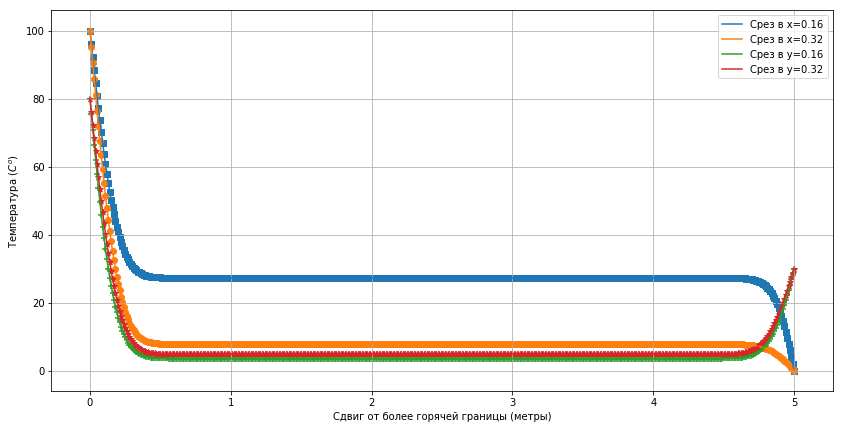

In [19]:
plt.figure(figsize=(14, 7))
grid = np.arange(data.shape[0]) / 100
plot(data, grid)
# plot(data_true, grid)  # проверенный график, вычисленный на одном процессе
plt.ylabel("Температура ($C^o$)")
plt.xlabel("Сдвиг от более горячей границы (метры)")
plt.legend()
plt.grid()
plt.savefig('temperature_plot.png', format='png', dpi=300)
plt.show()

_____________________
Ускорение и эффективность

In [6]:
times_on = []
fname_preffix = "time_on_"
fname_suffix = ".txt"
for i in range(1, 13):
    fname = (
        fname_preffix + str(i // 10 + int("0")) +
        str(i % 10 + int("0")) + fname_suffix
    )
    times = []
    with open(fname, "rt") as f:
        for line in f:
            times.append(float(line))
    times.sort()
    times_on.append(times)

times_on = np.array(times_on)
print(times_on)

[[ 4.35837603  4.40356398  4.55653     4.56052494  4.57253003]
 [ 2.0580802   2.16379499  2.16947222  2.23060083  2.23757386]
 [ 1.41381907  1.5218699   1.53806496  1.53988099  1.62191796]
 [ 1.18158698  1.1825428   1.19533706  1.19603205  1.24844909]
 [ 1.04575992  1.0598321   1.06644797  1.08218908  1.1495769 ]
 [ 0.84296584  0.89932299  0.90188003  0.92265606  1.00934601]
 [ 0.76284099  0.79676795  0.80409908  0.80536199  0.89650416]
 [ 0.65822601  0.66166305  0.69461107  0.75657797  0.7809999 ]
 [ 0.60387492  0.64205313  0.65762401  0.70729804  0.72307301]
 [ 0.53658509  0.54667497  0.54818082  0.55456901  0.57645917]
 [ 0.49798608  0.50356793  0.55691504  0.568506    0.58266783]
 [ 0.46892691  0.47027493  0.49177694  0.53427815  0.53698611]]


In [9]:
measured_vals = times_on[:, 1:4].mean(axis=1)
print(measured_vals)

[ 4.50687297  2.18795602  1.53327195  1.19130397  1.06948972  0.90795302
  0.80207634  0.70428403  0.66899172  0.54980826  0.54299633  0.49877667]


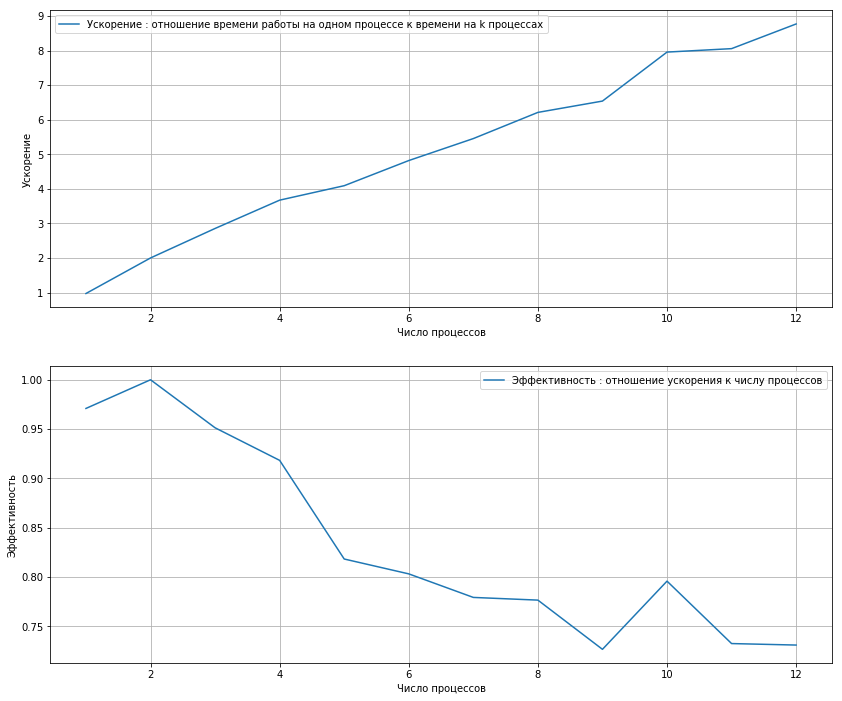

In [12]:
plt.figure(figsize=(14, 12))
plt.subplot(211)
plt.plot(np.arange(1, 13), measured_vals[1]*2 / measured_vals,
         label="Ускорение : отношение времени работы на" + 
         " одном процессе к времени на k процессах")
plt.xlabel("Число процессов")
plt.ylabel("Ускорение")
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(np.arange(1, 13), (measured_vals[1]*2 / measured_vals) / np.arange(1, 13),
         label="Эффективность : отношение ускорения к числу процессов")
plt.xlabel("Число процессов")
plt.ylabel("Эффективность")
plt.legend()
plt.grid()
plt.savefig('acceleration_and_efficiency.png', format='png', dpi=300)
plt.show()